**Taiwan, Pedestrian Hell?**

In 2023, Taiwan has been described as "Living Hell for Pedestrian" in a CNN report (though quoted from a Taiwanese). In the same year, the Foreign Ministry of Switzerland also warned its citizens of Taiwanese drivers' "aggressive behavior". With a binge-watching of the Youtube channels like Wowtchout, one could hardly disagree which such statements. Due to this chronic notority, a formerly sexist term "Three Preciouses" ("San-Bao": women, elderly, elderly women behind wheels) has now been used to describe all sorts of bad drivers.
In the CNN report, some reasons for this problem had been discussed. Yet with data I hope to dig in to this problem, and help identify the possible solution. 

On the first look in Wikipedia, the traffic fatalities per capita in Taiwan(12.1 per 100k) are on par with US (12.9 per 100k) and higher than developed nations like Luxembourg (8.7 per 100k). However, the car per capita in US (~0.9) and Luxembourg (~0.7) are much higher than Taiwan (0.365). After simple calculation, it's clear that a car in Taiwan killed 2.5 times more people than in US and three times more than in Luxembourg. 

There are a few explanations that I can think of. First, Taiwanese cars are made much more inferiorly that they become killing machines. Second, the Taiwanese drivers/riders are either poorly trained to drive or unwilling to follow the rules. Third, the road design in Taiwan works much worse than in comparable places. Last there are simply too many cars for this tiny but densely populated island. I hope we can use some data to help us decide which is the case, or find out any missing part of the story.


**Big Picture**

Let's look at the general trend across the world. While we often jumped into the particular issues identified, I think our discussion will benefit from some general trend accross different societies. World Health Organization has statistics on road kills and vehicles registered by country, without Taiwan, of course that is, that can provide us some overview and likeliness of our hypothesis. Since WHO doesn't provide information of Taiwan, we have to collect them from alternative sources. Other information like population or density is needed. The World Fact Book by CIA (that CIA) is an ideal place to collect them.

To see if my guesses have any truth in it, we can establish relative trends across countries, and see if Taiwanese figure lies with the trend or is an outlier. We will find out how road kill interacts with population, road length and number of vehicles. Relative measures such as density will also be created as ratios of variables.

When constructing density by country, landmass is various across the globe. An urbanized country like Singapore would be spreaded with dense roads, while a place like Mali wouldn't. Therefore, we should use measurement that reflects space of traffic better. Fortunately, there is load length by country in the database of CIA. An alternative density measure can be defined as population over the road length.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

**Data Processing**

As expected, the data doesn't come clean. This mostly involves string manipulation. The -99 entries are turned into np.NaN so Python won't mistake those number as real. Besides, the country names in WHO are different from CIA, so they needs to be taken care of. Regex matching and replacing are used to standardize the name. We are able to keep 155 of entries from WHO, only dropping two for lacking CIA's data, and one for zero road vatality (Impressive!). After the merge, we add by ourselves the information from Taiwan for comparison.

In [2]:
rk = pd.read_csv('road_kill_2016_who.csv',skiprows=1)
rk['Both sexes']=rk['Both sexes'].str.replace(r' \[.*?\]','')
rk['Female']=rk['Female'].str.replace(r' \[.*?\]','')
rk['Male']=rk['Male'].str.replace(r' \[.*?\]','')
rk['Both sexes.1']=rk['Both sexes.1'].str.replace(r' \[.*?\]','')
rk['Female.1']=rk['Female.1'].str.replace(r' \[.*?\]','')
rk['Male.1']=rk['Male.1'].str.replace(r' \[.*?\]','')
rk['Countries, territories and areas'] = rk['Countries, territories and areas'].str.replace(r'\s\(([^()]+)\)','')

C:\Users\88697\AppData\Local\Temp\ipykernel_91904\852992726.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  rk['Both sexes']=rk['Both sexes'].str.replace(r' \[.*?\]','')
C:\Users\88697\AppData\Local\Temp\ipykernel_91904\852992726.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  rk['Female']=rk['Female'].str.replace(r' \[.*?\]','')
C:\Users\88697\AppData\Local\Temp\ipykernel_91904\852992726.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  rk['Male']=rk['Male'].str.replace(r' \[.*?\]','')
C:\Users\88697\AppData\Local\Temp\ipykernel_91904\852992726.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  rk['Both sexes.1']=rk['Both sexes.1'].str.replace(r' \[.*?\]','')
C:\Users\88697\AppData\Local\Temp\ipykernel_91904\852992726.py:6: FutureWarning: The default value of regex will change 

In [3]:
rk[['Both sexes','Female','Male']] =rk[['Both sexes','Female','Male']].astype('int')
rk[['Both sexes.1','Female.1','Male.1']] =rk[['Both sexes.1','Female.1','Male.1']].astype('float')
rk

,"Countries, territories and areas",Year,Both sexes,Male,Female,Both sexes.1,Male.1,Female.1
0,Afghanistan,2016,5240,4239,1001,14.8,23.3,5.8
1,Albania,2016,399,309,90,13.8,21.0,6.4
2,Algeria,2016,8538,5792,2746,21.1,28.3,13.7
3,Angola,2016,7137,4530,2607,24.7,31.8,17.9
4,Antigua and Barbuda,2016,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
178,Venezuela,2016,10640,8937,1703,35.6,60.3,11.3
179,Viet Nam,2016,24970,19641,5329,26.7,42.1,11.4
180,Yemen,2016,7418,5027,2391,27.3,36.7,17.7
181,Zambia,2016,3472,2574,898,21.2,31.8,10.9


In [4]:
veh = pd.read_csv('RS_194_vehicles.csv')
veh['Number of registered vehicles']=veh['Number of registered vehicles'].str.replace(r' ','')
veh['Number of registered vehicles'].fillna(-99, inplace=True)
veh['Number of registered vehicles']=veh['Number of registered vehicles'].astype('int')
veh.loc[veh['Number of registered vehicles']==-99,'Number of registered vehicles']=np.nan
veh['Countries, territories and areas'] = veh['Countries, territories and areas'].str.replace(r'\s\(([^()]+)\)','')
veh

C:\Users\88697\AppData\Local\Temp\ipykernel_91904\574234948.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  veh['Countries, territories and areas'] = veh['Countries, territories and areas'].str.replace(r'\s\(([^()]+)\)','')


,"Countries, territories and areas",Year,Data Source,Number of registered vehicles
0,Afghanistan,2013,RS_001,655357.0
1,Albania,2016,RS_002,563106.0
2,Antigua and Barbuda,2016,RS_003,36030.0
3,Argentina,2016,RS_004,21633587.0
4,Armenia,,,NaN
...,...,...,...,...
158,United States of America,2015,RS_157,281312446.0
159,Uruguay,2016,RS_158,2342026.0
160,Venezuela,2016,RS_159,7999760.0
161,Viet Nam,2016,RS_160,50666855.0


Yes, there is a country with a year of no road kills. Impressive.

In [5]:
veh.loc[veh['Number of registered vehicles']>0,'Number of registered vehicles']
rk.loc[rk['Both sexes']<1,:]

,"Countries, territories and areas",Year,Both sexes,Male,Female,Both sexes.1,Male.1,Female.1
4,Antigua and Barbuda,2016,0,0,0,0.0,0.0,0.0


In [6]:
#from CIA
rl = pd.read_csv('Roadways_CIA.csv')
rl[' km'] = rl[' km'].str.replace(',','').astype('int')
rl.rename(columns={' km':'km'},inplace=True)
rl['name'] = rl['name'].str.replace(r',\s[TF].+','')
rl['name'] = rl['name'].str.replace(r'\s\(([^()]+)\)','')
rl['name'] = rl['name'].str.replace('Korea, South', 'South Korea')
rl['name'] = rl['name'].str.replace('Burma', 'Myanmar')
rl['name'] = rl['name'].str.replace('Gambiahe','Gambia')
rl.head()
#print(len(rl))

C:\Users\88697\AppData\Local\Temp\ipykernel_91904\1204963358.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  rl['name'] = rl['name'].str.replace(r',\s[TF].+','')
C:\Users\88697\AppData\Local\Temp\ipykernel_91904\1204963358.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  rl['name'] = rl['name'].str.replace(r'\s\(([^()]+)\)','')


,name,slug,km,date_of_information,ranking,region
0,United States,united-states,6586610,NaN,1,North America
1,India,india,6371847,2021.0,2,South Asia
2,China,china,5200000,2020.0,3,East and Southeast Asia
3,Brazil,brazil,2000000,NaN,4,South America
4,Russia,russia,1283387,NaN,5,Central Asia


In [7]:
ppl = pd.read_csv('Population_cia.csv')
ppl['value'] = ppl['value'].str.replace(',','').astype('int')
ppl['name'] = ppl['name'].str.replace(r',\s[TF].+','')
ppl['name'] = ppl['name'].str.replace(r'\s\(([^()]+)\)','')
ppl['name'] = ppl['name'].str.replace('Korea, South', 'South Korea')
ppl['name'] = ppl['name'].str.replace('Burma', 'Myanmar')
ppl.rename(columns={'value':'population'},inplace= True)
ppl.head()

C:\Users\88697\AppData\Local\Temp\ipykernel_91904\1042344452.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  ppl['name'] = ppl['name'].str.replace(r',\s[TF].+','')
C:\Users\88697\AppData\Local\Temp\ipykernel_91904\1042344452.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  ppl['name'] = ppl['name'].str.replace(r'\s\(([^()]+)\)','')


,name,slug,population,date_of_information,ranking,region
0,China,china,1416043270,NaN,1,East and Southeast Asia
1,India,india,1409128296,NaN,2,South Asia
2,United States,united-states,341963408,NaN,3,North America
3,Indonesia,indonesia,281562465,NaN,4,East and Southeast Asia
4,Pakistan,pakistan,252363571,NaN,5,South Asia


In [8]:
temp = veh.merge(rk,on='Countries, territories and areas')
temp = temp.merge(rl,left_on='Countries, territories and areas',right_on='name',how='left')
temp = temp.merge(ppl, on ='name',how='left')


In [9]:
#get idx of missing entries 
#temp[temp['km'].isna()]['Countries, territories and areas']
name = temp[temp['km'].isna()]['Countries, territories and areas'].to_list()
name

["Lao People's Democratic Republic",
 'Panama',
 'Republic of Korea',
 'Republic of Moldova',
 'Russian Federation',
 'Syrian Arab Republic',
 'Turkiye',
 'Trinidad and Tobago',
 'United Kingdom of Great Britain and Northern Ireland',
 'United Republic of Tanzania',
 'United States of America',
 'Viet Nam']

In [10]:
rpl = ['Laos',  'Panama', 'South Korea', 'Moldova', 'Russia', 'Syria', 'Turkey', 'Trinidad and Tobago', 'United Kingdom', 'Tanzania', 'United States', 'Vietnam']
rk1 = rk
veh1 = veh
for i in range(len(name)):
    rk1.loc[(rk['Countries, territories and areas'] == name[i]),'Countries, territories and areas'] = rpl[i]
    veh1.loc[(veh['Countries, territories and areas'] == name[i]),'Countries, territories and areas'] = rpl[i]
    #temp.loc
temp1 = veh1.merge(rk1,on='Countries, territories and areas')
temp1 = temp1.merge(rl,left_on='Countries, territories and areas',right_on='name',how='left')
temp1 = temp1.merge(ppl, on ='name',how='left')
#temp1[temp1['km'].isna()]['Countries, territories and areas']
#ppl[ppl['name'].str.contains('rini')]
#veh[veh['Countries, territories and areas'].str.contains('orea')]
# temp = veh.merge(rk,on='Countries, territories and areas')
# temp 
temp0 = temp
temp = temp1[temp1['km'].notna()]
temp = temp[temp['Both sexes'] > 0]
#add info of Taiwan for comparison
temp.loc[-1,['Countries, territories and areas','Both sexes','Number of registered vehicles']] = ['Taiwan',2865,22021000]
temp.loc[-1,['km']] = int(rl.loc[rl['name']=='Taiwan','km'])
temp.loc[-1,['population']] = int(ppl.loc[ppl['name']=='Taiwan','population'])
temp.reset_index(drop=True,inplace=True)

In [11]:
temp['vehicles per km'] = temp['Number of registered vehicles']/temp['km']
temp['road kills per km'] = temp['Both sexes']/temp['km']
temp['population per km'] = temp['population']/temp['km']
temp['road kills per vehicle'] = temp['Both sexes']/temp['Number of registered vehicles']
temp['population per vehicle'] = temp['population']/temp['Number of registered vehicles']
temp['km per vehicle'] = temp['km']/temp['Number of registered vehicles']
temp['road kills per capita'] = temp['Both sexes']/temp['population']
temp['km per capita'] = temp['km']/temp['population']
temp['vehicles per capita'] = temp['Number of registered vehicles']/temp['population']

In [12]:
temp.tail(7)

,"Countries, territories and areas",Year_x,Data Source,Number of registered vehicles,Year_y,Both sexes,Male,Female,Both sexes.1,Male.1,...,region_y,vehicles per km,road kills per km,population per km,road kills per vehicle,population per vehicle,km per vehicle,road kills per capita,km per capita,vehicles per capita
150,Tanzania,2016,RS_156,2163623.0,2016.0,16252.0,11162.0,5090.0,30.6,42.1,...,Africa,14.900677,0.111926,464.605559,0.007511,31.180164,0.067111,0.000241,0.002152,0.032072
151,United States,2015,RS_157,281312446.0,2016.0,41555.0,29380.0,12175.0,12.9,18.4,...,North America,42.709747,0.006309,51.917968,0.000148,1.215600,0.023414,0.000122,0.019261,0.822639
152,Uruguay,2016,RS_158,2342026.0,2016.0,460.0,350.0,110.0,13.4,21.2,...,South America,30.129496,0.005918,44.065893,0.000196,1.462550,0.033190,0.000134,0.022693,0.683737
153,Venezuela,2016,RS_159,7999760.0,2016.0,10640.0,8937.0,1703.0,35.6,60.3,...,South America,83.167098,0.110616,324.884405,0.001330,3.906405,0.012024,0.000340,0.003078,0.255990
154,Vietnam,2016,RS_160,50666855.0,2016.0,24970.0,19641.0,5329.0,26.7,42.1,...,East and Southeast Asia,259.207927,0.127745,541.055186,0.000493,2.087340,0.003858,0.000236,0.001848,0.479079
155,Zimbabwe,2017,RS_162,1198584.0,2016.0,5601.0,4367.0,1234.0,39.9,65.4,...,Africa,12.322617,0.057584,176.322412,0.004673,14.308844,0.081152,0.000327,0.005671,0.069887
156,Taiwan,NaN,NaN,22021000.0,NaN,2865.0,NaN,NaN,NaN,NaN,...,NaN,509.674582,0.066310,546.111049,0.000130,1.071490,0.001962,0.000121,0.001831,0.933280


By Annual National Statistic Report made by Taiwanese DGBAS in 2020, we get the road fatalities and total registered vehicles in 2019, and come up with the road kills per vehicle. Dividing 2865 deaths by 22 million vehicles, the road kills per vehicle in Taiwan was 0.000129. In terms of kills per vehicle, Taiwan stands, globally, at the safest quartile of the echelon. Its road belongs to the safer half across the globe. Compared to safest countries, however, roads in Taiwan are more dangerous. Swiss are certainly right to diss Taiwanese roads. While this makes Taiwanese drivers seem less deadly, we should point out that number of vehicles is at best a good apporximation of ownership rate. If car owners in Taiwan mostly own a motorcycle as well, the kills per vehicle figure jumps above 0.0002, topping Singapore and the US.

We do find a interesting fact that I missed so far. While the car ownership rate is below 0.4 in Taiwan, the number all vehicles is over 90% of the population. As we will show later by combining datasets from CIA and WHO, the vehicle to population ration in Taiwan is closer to the US and Luxembourg, and much higher than Singapore. The difference mainly comes from the types of vehicles owned, since Taiwan stands out from the comparison for having a two-wheel majority traffic.

In [13]:
(rk.set_index('Countries, territories and areas')['Both sexes']/veh.set_index('Countries, territories and areas')['Number of registered vehicles']).describe()#np.arange(0,1,0.1))

count    158.000000
mean       0.003818
std        0.009310
min        0.000000
25%        0.000190
50%        0.000643
75%        0.001998
max        0.065325
dtype: float64

In [14]:
#road kills of taiwan: (road kills per capita)/car per capita = road kills per car 
#car+motocycle vs only motorcycle as denominator
(2865/22201000),(2865/14039000)

(0.00012904824107022207, 0.00020407436427095948)

In [93]:
#Road Kills per Vehicle: More Developed Obs
(rk.set_index('Countries, territories and areas')['Both sexes']/veh.set_index('Countries, territories and areas')['Number of registered vehicles'])[['United States', 'Switzerland','Netherlands','Singapore']]

Countries, territories and areas
United States    0.000148
Switzerland      0.000037
Netherlands      0.000060
Singapore        0.000166
dtype: float64

In [ ]:
#Road Kills per Vehicle: Comparable Obs from East Asia
(rk.set_index('Countries, territories and areas')['Both sexes']/veh.set_index('Countries, territories and areas')['Number of registered vehicles'])[['Japan','Republic of Korea','China']]

Countries, territories and areas
Japan                0.000064
Republic of Korea    0.000194
China                0.000869
dtype: float64

In [ ]:
#Road Kills per Vehicle: Obs from SE Asia
(rk.set_index('Countries, territories and areas')['Both sexes']/veh.set_index('Countries, territories and areas')['Number of registered vehicles'])[[ 'Thailand','Philippines','Viet Nam','Indonesia']]

Countries, territories and areas
Thailand       0.000601
Philippines    0.001372
Viet Nam       0.000493
Indonesia      0.000247
dtype: float64

With some grand view, we should look into what factors cause this difference.

Let's start with something obvious: more cars mean more road kills.

Interestingly, more cars can't be translated into higher per capita casualty. This shows that the size of population and vehicles is not the sole aspect leading to road kills. Spatial factors must have some effect on road safety. 

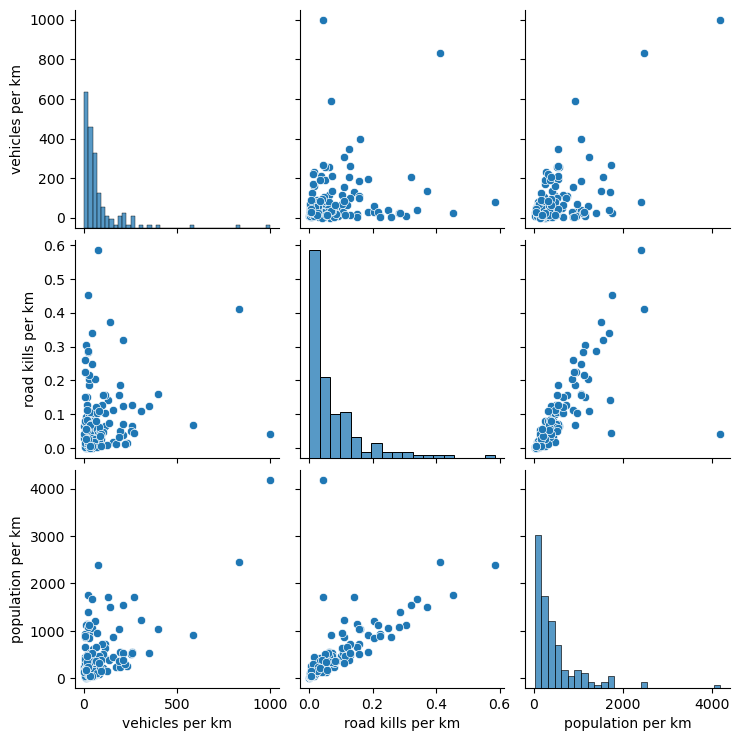

In [ ]:
sns.pairplot(data=temp[['vehicles per km','road kills per km','population per km']])

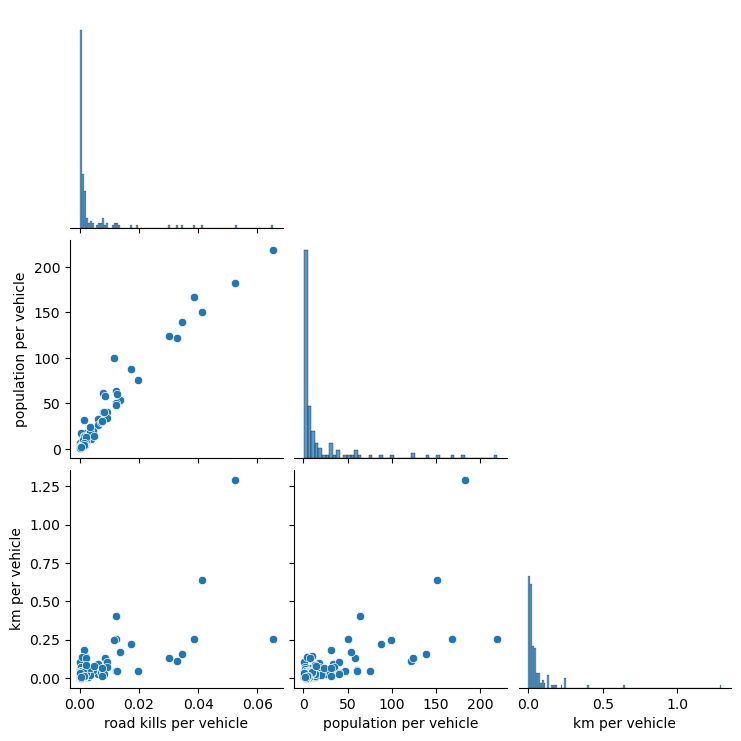

In [ ]:
sns.pairplot(data=temp[['road kills per vehicle','population per vehicle','km per vehicle']], corner=True)\
# g = sns.PairGrid(temp[['road kills per vehicle','population per vehicle','km per vehicle']], diag_sharey=False)
# g.map_lower(sns.scatterplot, alpha=0.3, edgecolor='none')
# g.map_diag(sns.histplot, multiple="stack", element="step")


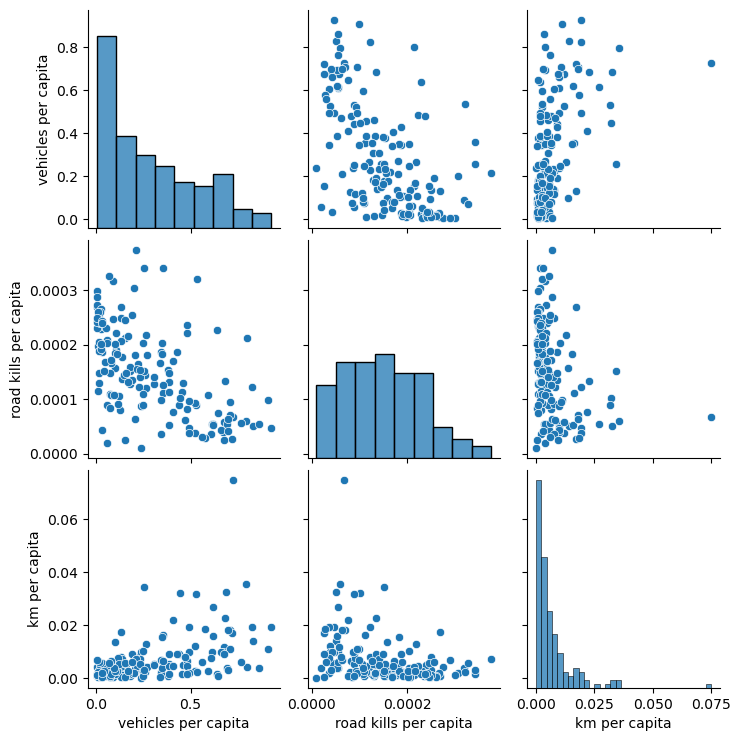

In [ ]:
sns.pairplot(data=temp[['vehicles per capita','road kills per capita','km per capita']])

In [ ]:
#from CIA
rl = pd.read_csv('Roadways_CIA.csv')
rl[' km'] = rl[' km'].str.replace(',','').astype('int')
rl.rename(columns={' km':'km'},inplace=True)
rl['name'] = rl['name'].str.replace(r',\s[TF].+','')
rl['name'] = rl['name'].str.replace(r'\s\(([^()]+)\)','')
rl['name'] = rl['name'].str.replace('Korea, South', 'South Korea')
rl['name'] = rl['name'].str.replace('Burma', 'Myanmar')
rl['name'] = rl['name'].str.replace('Gambiahe','Gambia')
rl.head()
#print(len(rl))

C:\Users\88697\AppData\Local\Temp\ipykernel_69768\1204963358.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  rl['name'] = rl['name'].str.replace(r',\s[TF].+','')
C:\Users\88697\AppData\Local\Temp\ipykernel_69768\1204963358.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  rl['name'] = rl['name'].str.replace(r'\s\(([^()]+)\)','')


,name,slug,km,date_of_information,ranking,region
0,United States,united-states,6586610,NaN,1,North America
1,India,india,6371847,2021.0,2,South Asia
2,China,china,5200000,2020.0,3,East and Southeast Asia
3,Brazil,brazil,2000000,NaN,4,South America
4,Russia,russia,1283387,NaN,5,Central Asia


In [ ]:
ppl = pd.read_csv('Population_cia.csv')
ppl['value'] = ppl['value'].str.replace(',','').astype('int')
ppl['name'] = ppl['name'].str.replace(r',\s[TF].+','')
ppl['name'] = ppl['name'].str.replace(r'\s\(([^()]+)\)','')
ppl['name'] = ppl['name'].str.replace('Korea, South', 'South Korea')
ppl['name'] = ppl['name'].str.replace('Burma', 'Myanmar')
ppl.rename(columns={'value':'population'},inplace= True)
ppl.head()

C:\Users\88697\AppData\Local\Temp\ipykernel_69768\1042344452.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  ppl['name'] = ppl['name'].str.replace(r',\s[TF].+','')
C:\Users\88697\AppData\Local\Temp\ipykernel_69768\1042344452.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  ppl['name'] = ppl['name'].str.replace(r'\s\(([^()]+)\)','')


,name,slug,population,date_of_information,ranking,region
0,China,china,1416043270,NaN,1,East and Southeast Asia
1,India,india,1409128296,NaN,2,South Asia
2,United States,united-states,341963408,NaN,3,North America
3,Indonesia,indonesia,281562465,NaN,4,East and Southeast Asia
4,Pakistan,pakistan,252363571,NaN,5,South Asia


In [ ]:
temp = veh.merge(rk,on='Countries, territories and areas')
temp = temp.merge(rl,left_on='Countries, territories and areas',right_on='name',how='left')
temp = temp.merge(ppl, on ='name',how='left')


In [ ]:
#get idx of missing entries 
#temp[temp['km'].isna()]['Countries, territories and areas']
name = temp[temp['km'].isna()]['Countries, territories and areas'].to_list()
name

["Lao People's Democratic Republic",
 'Panama',
 'Republic of Korea',
 'Republic of Moldova',
 'Russian Federation',
 'Syrian Arab Republic',
 'Turkiye',
 'Trinidad and Tobago',
 'United Kingdom of Great Britain and Northern Ireland',
 'United Republic of Tanzania',
 'United States of America',
 'Viet Nam']

In [ ]:
rpl = ['Laos',  'Panama', 'South Korea', 'Moldova', 'Russia', 'Syria', 'Turkey', 'Trinidad and Tobago', 'United Kingdom', 'Tanzania', 'United States', 'Vietnam']
rk1 = rk
veh1 = veh
for i in range(len(name)):
    rk1.loc[(rk['Countries, territories and areas'] == name[i]),'Countries, territories and areas'] = rpl[i]
    veh1.loc[(veh['Countries, territories and areas'] == name[i]),'Countries, territories and areas'] = rpl[i]
    #temp.loc
temp1 = veh1.merge(rk1,on='Countries, territories and areas')
temp1 = temp1.merge(rl,left_on='Countries, territories and areas',right_on='name',how='left')
temp1 = temp1.merge(ppl, on ='name',how='left')
#temp1[temp1['km'].isna()]['Countries, territories and areas']
#ppl[ppl['name'].str.contains('rini')]
#veh[veh['Countries, territories and areas'].str.contains('orea')]
# temp = veh.merge(rk,on='Countries, territories and areas')
# temp 
temp0 = temp
temp = temp1[temp1['km'].notna()]
temp = temp[temp['Both sexes'] > 0]
#add info of Taiwan for comparison
temp.loc[-1,['Countries, territories and areas','Both sexes','Number of registered vehicles']] = ['Taiwan',2865,22021000]
temp.loc[-1,['km']] = int(rl.loc[rl['name']=='Taiwan','km'])
temp.loc[-1,['population']] = int(ppl.loc[ppl['name']=='Taiwan','population'])
temp.reset_index(drop=True,inplace=True)

In [ ]:
temp['vehicles per km'] = temp['Number of registered vehicles']/temp['km']
temp['road kills per km'] = temp['Both sexes']/temp['km']
temp['population per km'] = temp['population']/temp['km']
temp['road kills per vehicle'] = temp['Both sexes']/temp['Number of registered vehicles']
temp['population per vehicle'] = temp['population']/temp['Number of registered vehicles']
temp['km per vehicle'] = temp['km']/temp['Number of registered vehicles']
temp['road kills per capita'] = temp['Both sexes']/temp['population']
temp['km per capita'] = temp['km']/temp['population']
temp['vehicles per capita'] = temp['Number of registered vehicles']/temp['population']

In [ ]:
temp.tail(7)

,"Countries, territories and areas",Year_x,Data Source,Number of registered vehicles,Year_y,Both sexes,Male,Female,Both sexes.1,Male.1,...,region_y,vehicles per km,road kills per km,population per km,road kills per vehicle,population per vehicle,km per vehicle,road kills per capita,km per capita,vehicles per capita
150,Tanzania,2016,RS_156,2163623.0,2016.0,16252.0,11162.0,5090.0,30.6,42.1,...,Africa,14.900677,0.111926,464.605559,0.007511,31.180164,0.067111,0.000241,0.002152,0.032072
151,United States,2015,RS_157,281312446.0,2016.0,41555.0,29380.0,12175.0,12.9,18.4,...,North America,42.709747,0.006309,51.917968,0.000148,1.215600,0.023414,0.000122,0.019261,0.822639
152,Uruguay,2016,RS_158,2342026.0,2016.0,460.0,350.0,110.0,13.4,21.2,...,South America,30.129496,0.005918,44.065893,0.000196,1.462550,0.033190,0.000134,0.022693,0.683737
153,Venezuela,2016,RS_159,7999760.0,2016.0,10640.0,8937.0,1703.0,35.6,60.3,...,South America,83.167098,0.110616,324.884405,0.001330,3.906405,0.012024,0.000340,0.003078,0.255990
154,Vietnam,2016,RS_160,50666855.0,2016.0,24970.0,19641.0,5329.0,26.7,42.1,...,East and Southeast Asia,259.207927,0.127745,541.055186,0.000493,2.087340,0.003858,0.000236,0.001848,0.479079
155,Zimbabwe,2017,RS_162,1198584.0,2016.0,5601.0,4367.0,1234.0,39.9,65.4,...,Africa,12.322617,0.057584,176.322412,0.004673,14.308844,0.081152,0.000327,0.005671,0.069887
156,Taiwan,NaN,NaN,22021000.0,NaN,2865.0,NaN,NaN,NaN,NaN,...,NaN,509.674582,0.066310,546.111049,0.000130,1.071490,0.001962,0.000121,0.001831,0.933280


**Let's End with some Thoguhts here**

Compare to analysis on every country, the trends sometimes changes when only countries with less road kills is concerned. These relationships include per capita of road kills v.s. vehicles and per veichle of road length and road kills. This means that there is an underlying difference that is not observed from our data. What we can do here is to make some informed guesses as explanation, and find out how Taiwan fit into this. 

On the first glance, it seems, against intuition, that more vehicles per capita associates to less vatality rate. The trend reverses when the scope is limits to the safer countries. Interestingly, they mostly have a high vehicle rate. Between countries with high and low vehicle rates, we can expected a difference in economy condition. This means the improvement in vatality rate should in fact be the result of factors like better infrastructure or more accountability on road. Among safer countries, more vehicles per capita do come with higher road kill rate. Taiwan doesn't stand out in this trend, however, it does have one of the highest vehicles per capita in this group, and higher vatality rate than other high vehicle rate countries.

The other relationship that has a change in trend is between road kills and road length controlled by number of vehicles. The underlying factors are more conflicting here because less road for vehicles means denser traffic, but this could as well lead to more accountability on road. For safer countries, the relationship between denser road and safer traffic disappears. Again, Taiwan has one of the densist road for vehicles and higher vatalities than comparables.

So far, we have a preliminary theory for the Taiwanese traffice issue. While there are signs of subjective factors causing high vatality rates in Taiwan, we should not ignore the fact that the Island has much denser traffic and is filled with more vehicles. A deeper analysis might reveal if removing these two factors can relieve the trouble for Taiwanese.

In [85]:
def sinplot(data, x, y, log = False, title = False):
    
    sns.lmplot(data, x=x,y=y)
    sns.scatterplot(data=data[data['Countries, territories and areas'] == 'Taiwan'],
                    x = x,
                    y = y,
                    c = 'red',
                    label = 'Taiwan'
                    )
    plt.legend()
    if log:
        plt.xscale('log')
        plt.yscale('log')
    if title:
        plt.title(title)

In [100]:
def compplot(data, x, y, log2 = False):
    fig, ax = plt.subplots(1,2) 

    sns.regplot(data= data,
            x=x,
            y=y,
            ax = ax[0])
    sns.scatterplot(data=data[data['Countries, territories and areas'] == 'Taiwan'],
                    x = x,
                    y = y,
                    c = 'red',
                    label = 'Taiwan',
                    ax = ax[0]
                    )
    ax[0].set_xscale('log')
    ax[0].set_yscale('log')
    sns.regplot(data= data[data['road kills per vehicle'] < 3e-4], 
            x = x,
            y = y,
            ax = ax[1])
    sns.scatterplot(data=data[data['Countries, territories and areas'] == 'Taiwan'],
                    x = x,
                    y = y,
                    c = 'red',
                    label = 'Taiwan',
                    ax = ax[1]
                    )
    if log2:
        ax[1].set_xscale('log')
        ax[1].xaxis.set_tick_params(rotation=45)
    ax[1].set_yscale('log')
    # plt.xscale('log')
    # plt.yscale('log')
    plt.tight_layout()
    plt.legend()

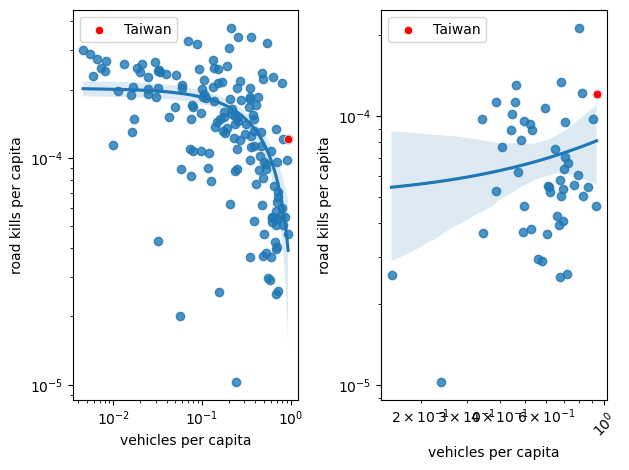

In [101]:
compplot(temp,'vehicles per capita','road kills per capita',log2= True)

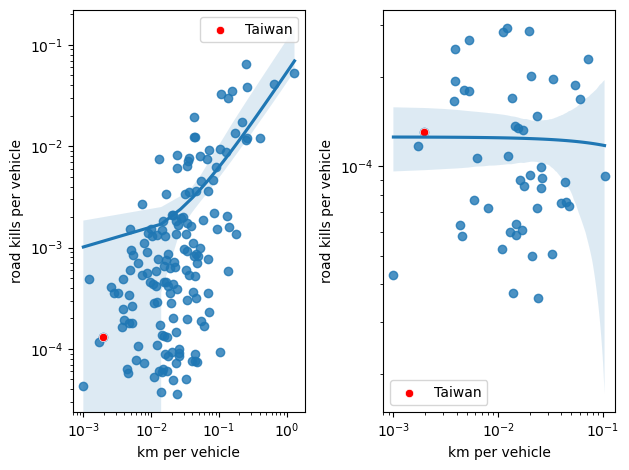

In [ ]:
compplot(temp,'km per vehicle','road kills per vehicle',log2= True)

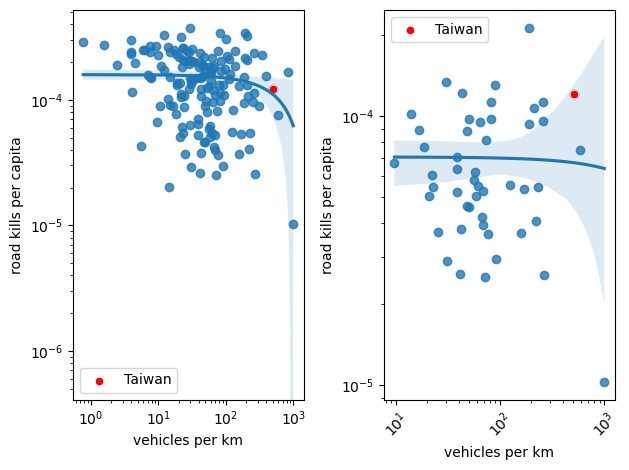

In [102]:
compplot(temp,'vehicles per km','road kills per capita',log2= True)

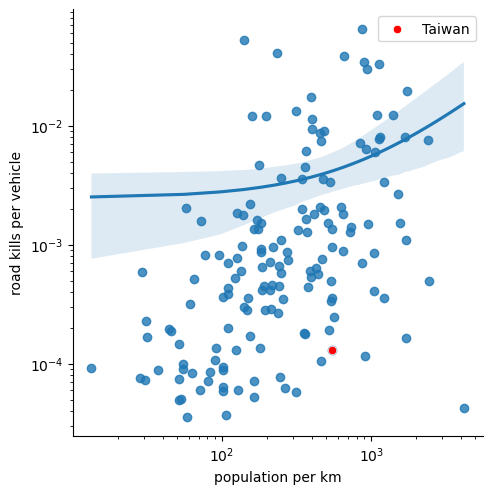

In [89]:
sinplot(temp, 'population per km','road kills per vehicle',log =True)


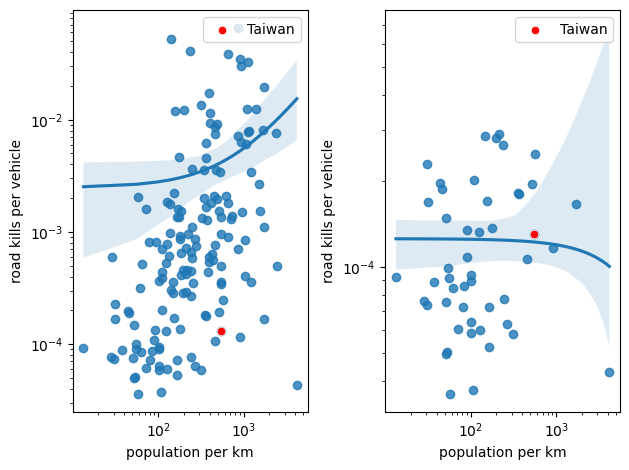

In [90]:
compplot(temp,'population per km','road kills per vehicle', log2= True)

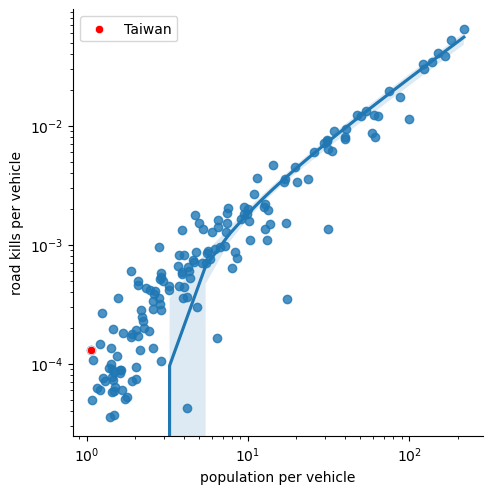

In [ ]:
sns.lmplot(data= temp, x='population per vehicle',y='road kills per vehicle')
sns.scatterplot(data=temp[temp['Countries, territories and areas'] == 'Taiwan'],
                x = 'population per vehicle',
                y = 'road kills per vehicle',
                c = 'red',
                label = 'Taiwan'
                )
plt.xscale('log')
plt.yscale('log')
plt.legend()
#plt.xlim(0,2000)
#plt.ylim(0,0.02)

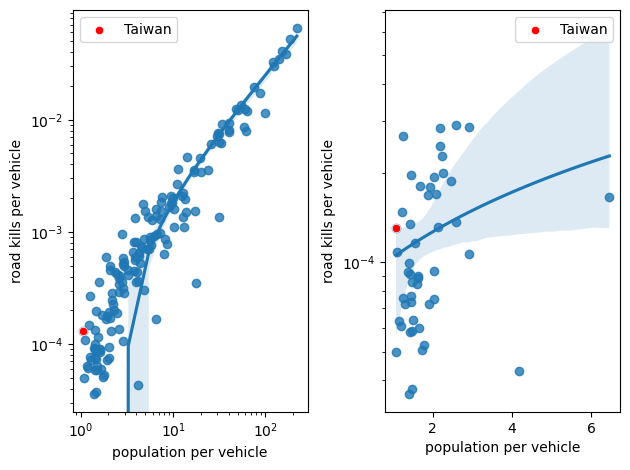

In [69]:
compplot(temp, 'population per vehicle','road kills per vehicle')

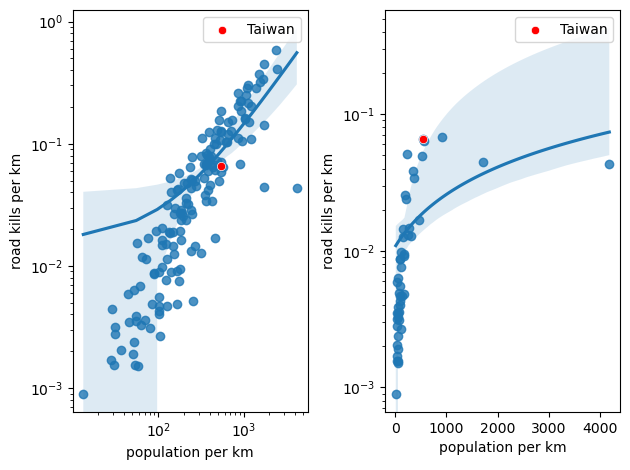

In [103]:
compplot(temp, 'population per km','road kills per km')

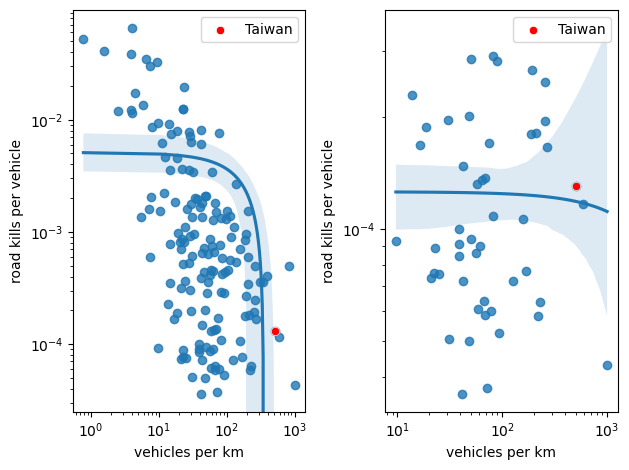

In [91]:
compplot(temp, 'vehicles per km','road kills per vehicle',log2 = True)

In [ ]:
sns.lmplot(data= temp, x='vehicles per km',y='road kills per km')
sns.scatterplot(data=temp[temp['Countries, territories and areas'] == 'Taiwan'],
                x='vehicles per km',
                y='road kills per km',
                c = 'red',
                label = 'Taiwan'
                )
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylabel('Road Kills per 100k people in 2016')
plt.title("car vs road kills by country")

In [24]:
# Run R-style regression #+ I(Q("km per vehicle")**2)
#model = sm.formula.ols(formula='np.log(Q("Both sexes")) ~ np.log(Q("population")) +   np.log(Q("km"))  +   np.log(Q("Number of registered vehicles"))', data=temp).fit()#
model = sm.formula.ols(formula='np.log(Q("Both sexes")) ~ np.log(Q("population"))  +  Q("vehicles per km") +  I(Q("vehicles per km")**2)  + Q("population per km") + I(Q("population per km")**2)', data=temp).fit()#
#model = sm.formula.ols(formula='np.log(Q("Both sexes")) ~ np.log(Q("population"))  +  np.log(Q("vehicles per km"))  + np.log(Q("population per km"))', data=temp).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(Q("Both sexes"))   R-squared:                       0.927
Model:                                 OLS   Adj. R-squared:                  0.924
Method:                      Least Squares   F-statistic:                     380.2
Date:                     Wed, 14 Aug 2024   Prob (F-statistic):           2.88e-83
Time:                             14:11:58   Log-Likelihood:                -133.33
No. Observations:                      156   AIC:                             278.7
Df Residuals:                          150   BIC:                             297.0
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -9.4473      0.405    -23.311      0.000     -10.248      -8.647
np.log(Q("population"))            1.0174      0.026     39.175      0.000       0.966       1.069
Q("vehicles per km")              -0.0043      0.001     -4.116      0.000      -0.006      -0.002
I(Q("vehicles per km") ** 2)    5.862e-06   1.79e-06      3.279      0.001    2.33e-06     9.4e-06
Q("population per km")             0.0016      0.000      6.976      0.000       0.001       0.002
I(Q("population per km") ** 2) -6.011e-07   1.03e-07     -5.861      0.000   -8.04e-07   -3.98e-07
==============================================================================
Omnibus:                        5.964   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                5.528
Skew:                          -0.430   Prob(JB):                       0.0630
Kurtosis:                       3.331   Cond. No.                     1.48e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# Run R-style regression #+ I(Q("km per vehicle")**2)
model1 = sm.formula.ols(formula='np.log(Q("road kills per vehicle")) ~ np.log(Q("population per vehicle")) +   np.log(Q("km per vehicle")) ', data=temp).fit()#
model2 = sm.formula.ols(formula='np.log(Q("road kills per vehicle")) ~ np.log(Q("population per km")) +   Q("vehicles per km") + I( Q("vehicles per km")**2) ', data=temp).fit()#
#model3 = sm.formula.ols(formula='Q("road kills per vehicle") ~ Q("population per km") +  I( Q("population per km")**2) +  Q("vehicles per km") + I( Q("vehicles per km")**2) ', data=temp).fit()#
#model4 = sm.formula.ols(formula='Q("road kills per vehicle") ~ Q("population per km")  +  Q("vehicles per km")  + Q("vehicles per capita") ', data=temp).fit()#
#model.summary()
print(summary_col([model1,model2], stars=True))#,model3,model4


                                    np.log(Q("road kills per vehicle")) I np.log(Q("road kills per vehicle")) II
----------------------------------------------------------------------------------------------------------------
I(Q("vehicles per km") ** 2)                                              0.0000***                             
                                                                          (0.0000)                              
Intercept                           -9.7590***                            -13.5437***                           
                                    (0.2546)                              (0.4187)                              
Q("vehicles per km")                                                      -0.0186***                            
                                                                          (0.0014)                              
R-squared                           0.8923                                0.7199               

In [816]:
# Run R-style regression
# #+ I(Q("vehicles per km")**2)
model = sm.formula.ols(formula='np.log(Q("road kills per km")) ~ np.log(Q("vehicles per km"))  + np.log(Q("population per km")) ', data=temp).fit()#
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     np.log(Q("road kills per km"))   R-squared:                       0.841
Model:                                        OLS   Adj. R-squared:                  0.839
Method:                             Least Squares   F-statistic:                     401.3
Date:                            Tue, 13 Aug 2024   Prob (F-statistic):           2.28e-61
Time:                                    21:41:33   Log-Likelihood:                -136.67
No. Observations:                             155   AIC:                             279.3
Df Residuals:                                 152   BIC:                             288.5
Df Model:                                       2                                         
Covariance Type:                        nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -9.7470      0.256    -38.073      0.000     -10.253      -9.241
np.log(Q("vehicles per km"))      -0.2380      0.042     -5.697      0.000      -0.321      -0.155
np.log(Q("population per km"))     1.2962      0.046     28.076      0.000       1.205       1.387
==============================================================================
Omnibus:                       34.620   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.202
Skew:                          -1.003   Prob(JB):                     9.39e-16
Kurtosis:                       5.586   Cond. No.                         37.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [817]:
# Run R-style regression
model = sm.formula.ols(formula='np.log(Q("road kills per km")) ~ np.log(Q("vehicles per km"))  +  np.log(Q("vehicles per capita"))', data=temp).fit()#
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     np.log(Q("road kills per km"))   R-squared:                       0.841
Model:                                        OLS   Adj. R-squared:                  0.839
Method:                             Least Squares   F-statistic:                     401.3
Date:                            Tue, 13 Aug 2024   Prob (F-statistic):           2.28e-61
Time:                                    21:41:33   Log-Likelihood:                -136.67
No. Observations:                             155   AIC:                             279.3
Df Residuals:                                 152   BIC:                             288.5
Df Model:                                       2                                         
Covariance Type:                        nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -9.7470      0.256    -38.073      0.000     -10.253      -9.241
np.log(Q("vehicles per km"))         1.0582      0.051     20.736      0.000       0.957       1.159
np.log(Q("vehicles per capita"))    -1.2962      0.046    -28.076      0.000      -1.387      -1.205
==============================================================================
Omnibus:                       34.620   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.202
Skew:                          -1.003   Prob(JB):                     9.39e-16
Kurtosis:                       5.586   Cond. No.                         24.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [836]:
density = ppl.merge(rl,on='name')
density['density'] = density['population']/density['km']
density.sort_values('density',ascending=True).head()

,name,slug_x,population,date_of_information_x,ranking_x,region_x,slug_y,km,date_of_information_y,ranking_y,region_y,density
218,Falkland Islands,falkland-islands-islas-malvinas,3662,2021,228,South America,falkland-islands-islas-malvinas,440,NaN,198,South America,8.322727
220,Niue,niue,2000,2022,230,Australia and Oceania,niue,234,NaN,208,Australia and Oceania,8.547009
222,Christmas Island,christmas-island,1692,NaN,232,Australia and Oceania,christmas-island,142,NaN,212,Australia and Oceania,11.915493
156,Estonia,estonia,1193791,NaN,160,Europe,estonia,89382,2022.0,57,Europe,13.356056
221,Norfolk Island,norfolk-island,1748,2016,231,Australia and Oceania,norfolk-island,80,NaN,217,Australia and Oceania,21.850000


<Axes: ylabel='density'>

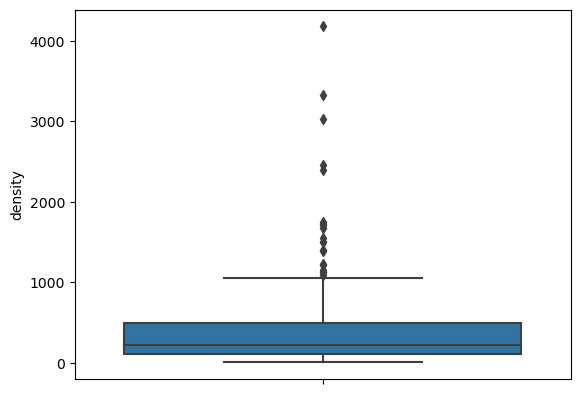

In [819]:
density[density['name'] == 'Taiwan']['density']
density[density['density'] >= 500]
sns.boxplot(data=density, y='density')

In [820]:
#https://data.gov.tw/dataset/12818
df = pd.read_csv("traffic23.csv", parse_dates=['發生日期'])
df.tail()
df = df[:-2]

In [821]:
#df.info()
df.dropna(subset= ['發生月份'],inplace=True)


In [822]:
df['hour'] = df['發生時間'].astype(int)//10000
#df['hour']
df['weekday'] = df["發生日期"].dt.day_name()
#df['weekday']

In [823]:
#df.groupby(["光線名稱",'道路類別-第1當事者-名稱'])
#df.agg({"光線名稱":'count','道路類別-第1當事者-名稱':'count'})
pd.crosstab(df["光線名稱"],df['道路類別-第1當事者-名稱'])
pd.crosstab(df["天候名稱"],df["肇事逃逸類別名稱-是否肇逃"])
pd.crosstab(df["weekday"],df["肇事逃逸類別名稱-是否肇逃"])
pd.crosstab(df["hour"],df["肇事逃逸類別名稱-是否肇逃"])
#pd.crosstab(df["天候名稱"],df["weekday"],margins=True)
#df['路面狀況-路面狀態名稱'].value_counts()
#pd.crosstab(df['發生日期'].dt.dayofweek,df["肇因研判大類別名稱-個別"])

肇事逃逸類別名稱-是否肇逃,否,是
hour,,
0,36,1
1,42,0
2,36,1
3,23,0
4,54,1
5,116,1
6,71,0
7,102,0
8,113,2


In [824]:
#df.plot.scatter("經度","緯度", c= '天候名稱')
#df.plot.bar("速限-第1當事者")
#df.hist("速限-第1當事者",bins = 20)
#df["發生日期"].dt.dayofweek.value_counts().sort_values()
df["發生日期"].dt.day_name().value_counts().sort_values(ascending=False)#.plot(kind='bar')

#df['發生日期'].value_counts().sort_values(ascending = False)
#df['hour'].value_counts().sort_index()
#df.groupby('發生月份').count()

Friday       291
Monday       286
Sunday       268
Thursday     262
Wednesday    255
Saturday     253
Tuesday      234
Name: 發生日期, dtype: int64

<Axes: xlabel='hour', ylabel='weekday'>

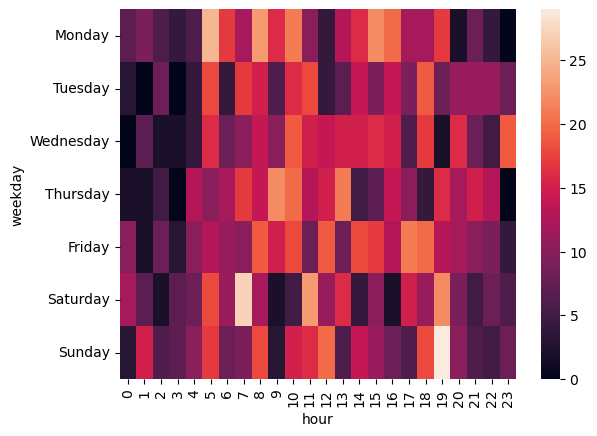

In [825]:
weekord =['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']
#df.loc[df["發生日期"].dt.dayofweek ==2,['hour']].value_counts().sort_index()
sns.heatmap(pd.crosstab(df['weekday'],df['hour']).loc[weekord,:])


Text(0.5, 0, 'date')

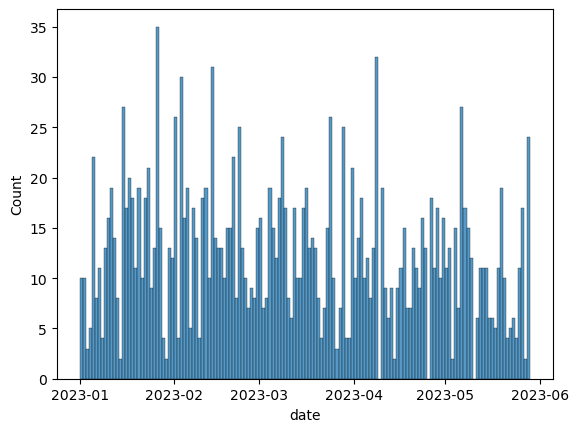

In [826]:
sns.histplot(df['發生日期'],bins=(148))

plt.xlabel('date')

In [827]:
#sns.histplot(data=df,x='天候名稱')

In [828]:
df['發生日期'].max()-df['發生日期'].min()

Timedelta('148 days 00:00:00')

In [829]:
dfweek = df.groupby('weekday')

In [830]:
# Create a facetted pointplot of Average SAT_AVG_ALL scores facetted by Degree Type 
sns.catplot(data=dfweek.count()['天候名稱'],
        x="天候名稱",
        kind='bar',
        row=dfweek.count().index,
        #row_order=['Monday', 'Tuesday', 'Wenesday', 'Thursday','Friday','Saturday','Sunday']
        )

plt.show()
plt.clf()

ValueError: Could not interpret input '天候名稱'